# **Limpieza y feature engineering**

# - En este NB procedemos a preparar los datos para el modelo.

In [1]:
import pandas as pd

# ***SPOTIFY DATA***


In [2]:
spotaylor= pd.read_csv('Data/spotify_taylorswift.csv')

In [3]:
spotaylor.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [4]:
# Nueva Feature: Popularidad Relativa
spotaylor['relative_popularity'] = spotaylor['popularity'] / spotaylor['popularity'].max()


In [5]:
spotaylor.columns

Index(['Unnamed: 0', 'name', 'album', 'artist', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'tempo', 'relative_popularity'],
      dtype='object')

In [6]:
spotaylor.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009,0.597561
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586,0.658537
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953,0.719512
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028,0.597561
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558,0.609756


In [7]:
#spotaylor = spotaylor.drop(['release_date','Unnamed: 0'],inplace=True, axis=1)

In [35]:
spotaylor.shape

(171, 16)

In [8]:
spotaylor.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009,0.597561
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586,0.658537
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953,0.719512
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028,0.597561
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558,0.609756


# **LYRICS**

In [9]:
lyrics = pd.read_csv('Data/taylor_lyrics.csv')

In [10]:
lyrics.head()

,Album,Release Date,Song Title,Featured Artists,Lyrics
0,Taylor Swift (Deluxe),06/11/2007,Tim McGraw,NaN,He said the way my blue eyes shined Put those ...
1,Taylor Swift (Deluxe),06/11/2007,Picture to Burn,NaN,State the obvious I didn t get my perfect fant...
2,Taylor Swift (Deluxe),06/11/2007,Teardrops On My Guitar,NaN,Drew looks at me I fake a smile so he won t se...
3,Taylor Swift (Deluxe),06/11/2007,A Place In This World,NaN,I don t know what I want so don t ask me Cause...
4,Taylor Swift (Deluxe),06/11/2007,Cold as You,NaN,You have a way of coming easily to me And when...


In [11]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

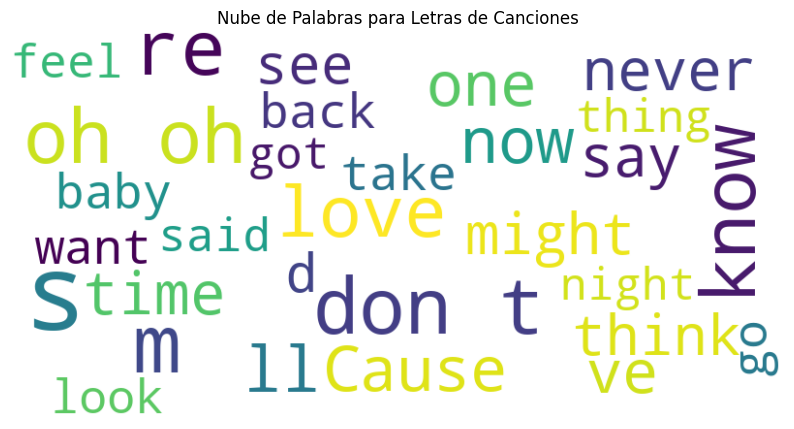

In [12]:
wordcloud = WordCloud(width=800, max_words=30, height=400, random_state=21, max_font_size=110, background_color='white').generate(' '.join(lyrics['Lyrics']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nube de Palabras para Letras de Canciones')
plt.show()

In [13]:
# Feature: Conteo de Palabras Clave
keywords = ['love', 'cause','see','one','never','know', 'time', 'might', 'say', 'oh',
            'go', 'feel', 'take', 'baby', 'time', 'look', 'go']
# Con un for loop,creamos dos columnas para cada keyword para conocer la proporción de palabras clave en letras 
for keyword in keywords:
    lyrics[keyword + '_count'] = lyrics['Lyrics'].apply(lambda x: x.lower().count(keyword.lower()))
    lyrics[keyword + '_ratio'] = lyrics[keyword + '_count'] / lyrics['Lyrics'].apply(lambda x: len(x.split()) if len(x.split()) > 0 else 1)

# Luego de coger las palabras del wordcloud me planteo que seguro hay forma de coger las palabras mas usadas directamente con código

In [14]:
%pip install textblob


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

In [15]:
# NuevaFeature: Análisis de Sentimiento 
lyrics['sentiment'] = lyrics['Lyrics'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
lyrics.shape

(207, 36)

In [17]:
# New Feature: Longitud de la letra
lyrics['lyrics_length'] = lyrics['Lyrics'].apply(len)

In [18]:
lyrics.columns

Index(['Album', 'Release Date', 'Song Title', 'Featured Artists', 'Lyrics',
       'love_count', 'love_ratio', 'cause_count', 'cause_ratio', 'see_count',
       'see_ratio', 'one_count', 'one_ratio', 'never_count', 'never_ratio',
       'know_count', 'know_ratio', 'time_count', 'time_ratio', 'might_count',
       'might_ratio', 'say_count', 'say_ratio', 'oh_count', 'oh_ratio',
       'go_count', 'go_ratio', 'feel_count', 'feel_ratio', 'take_count',
       'take_ratio', 'baby_count', 'baby_ratio', 'look_count', 'look_ratio',
       'sentiment', 'lyrics_length'],
      dtype='object')

In [19]:
lyrics.head()

,Album,Release Date,Song Title,Featured Artists,Lyrics,love_count,love_ratio,cause_count,cause_ratio,see_count,...,feel_count,feel_ratio,take_count,take_ratio,baby_count,baby_ratio,look_count,look_ratio,sentiment,lyrics_length
0,Taylor Swift (Deluxe),06/11/2007,Tim McGraw,NaN,He said the way my blue eyes shined Put those ...,0,0.000000,0,0.000000,1,...,0,0.000000,1,0.002632,0,0.000000,1,0.002632,0.105707,1783
1,Taylor Swift (Deluxe),06/11/2007,Picture to Burn,NaN,State the obvious I didn t get my perfect fant...,2,0.006211,3,0.009317,0,...,0,0.000000,0,0.000000,2,0.006211,0,0.000000,-0.199550,1522
2,Taylor Swift (Deluxe),06/11/2007,Teardrops On My Guitar,NaN,Drew looks at me I fake a smile so he won t se...,2,0.006211,3,0.009317,3,...,0,0.000000,1,0.003106,0,0.000000,3,0.009317,0.260434,1384
3,Taylor Swift (Deluxe),06/11/2007,A Place In This World,NaN,I don t know what I want so don t ask me Cause...,0,0.000000,1,0.003731,1,...,2,0.007463,0,0.000000,0,0.000000,0,0.000000,0.216111,1056
4,Taylor Swift (Deluxe),06/11/2007,Cold as You,NaN,You have a way of coming easily to me And when...,0,0.000000,2,0.007634,0,...,1,0.003817,2,0.007634,0,0.000000,0,0.000000,0.247917,1211


In [20]:
lyrics.columns

Index(['Album', 'Release Date', 'Song Title', 'Featured Artists', 'Lyrics',
       'love_count', 'love_ratio', 'cause_count', 'cause_ratio', 'see_count',
       'see_ratio', 'one_count', 'one_ratio', 'never_count', 'never_ratio',
       'know_count', 'know_ratio', 'time_count', 'time_ratio', 'might_count',
       'might_ratio', 'say_count', 'say_ratio', 'oh_count', 'oh_ratio',
       'go_count', 'go_ratio', 'feel_count', 'feel_ratio', 'take_count',
       'take_ratio', 'baby_count', 'baby_ratio', 'look_count', 'look_ratio',
       'sentiment', 'lyrics_length'],
      dtype='object')

# ***YOUTUBE***

In [22]:
youtailor = pd.read_csv('Data/taylor_channel.csv')

In [23]:
youtailor.head()

,id,title,publication_date,description,channel_id,channel_title,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,url
0,_9RWI5JBew0,"Taylor Swift - Mine (Live, BBC Radio 2 Session)",2011-08-24T11:29:30Z,Shop music here: http://smarturl.it/TASmusic\n...,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,1763678,23082,439,0,1450,https://www.youtube.com/watch?v=_9RWI5JBew0
1,_zUCMfYkgj0,Taylor Swift - ME! (Live on The Voice / 2019) ...,2019-05-22T03:00:05Z,‘folklore’ album out now: https://store.taylor...,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,11493472,393098,7077,0,12302,https://www.youtube.com/watch?v=_zUCMfYkgj0
2,-BjZmE2gtdo,Taylor Swift - Lover,2019-08-22T21:30:09Z,Official music video by Taylor Swift performin...,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,164079252,2548823,100492,0,94871,https://www.youtube.com/watch?v=-BjZmE2gtdo
3,-CmadmM5cOk,Taylor Swift - Style,2015-02-13T13:20:01Z,►Exclusive Merch: https://store.taylorswift.co...,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,676540116,3198090,151759,0,152071,https://www.youtube.com/watch?v=-CmadmM5cOk
4,1iRbIYkccgw,Taylor Swift - it’s time to go (Official Lyric...,2021-01-07T05:00:01Z,Official lyric video by Taylor Swift performin...,UCANLZYMidaCbLQFWXBC95Jg,TaylorSwiftVEVO,7665916,239528,2669,0,10087,https://www.youtube.com/watch?v=1iRbIYkccgw


In [24]:
#youtailor_cleaned = youtailor.drop(['id', 'dislikeCount', 'publication_date', 'description', 'channel_id', 'channel_title', 'favoriteCount', 'url'],inplace=True, axis=1)# Eliminar columnas altamente correlacionadas y las que no nos son útiles.
#ELIMINACIÓN DE COLUMNAAS

In [25]:
youtailor.head(2)

,title,viewCount,likeCount,commentCount
0,"Taylor Swift - Mine (Live, BBC Radio 2 Session)",1763678,23082,1450
1,Taylor Swift - ME! (Live on The Voice / 2019) ...,11493472,393098,12302


In [26]:
youtailor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         197 non-null    object
 1   viewCount     197 non-null    int64 
 2   likeCount     197 non-null    int64 
 3   commentCount  197 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [27]:
# al igual que en lyrics, hacemos un new feature para ver la proporción de comentarios en YT en relación con las viewCounts
youtailor['comment_ratio'] = youtailor['commentCount'] / youtailor['viewCount']

In [28]:
youtailor.shape

(197, 5)

In [29]:
youtailor.head()

,title,viewCount,likeCount,commentCount,comment_ratio
0,"Taylor Swift - Mine (Live, BBC Radio 2 Session)",1763678,23082,1450,0.000822
1,Taylor Swift - ME! (Live on The Voice / 2019) ...,11493472,393098,12302,0.001070
2,Taylor Swift - Lover,164079252,2548823,94871,0.000578
3,Taylor Swift - Style,676540116,3198090,152071,0.000225
4,Taylor Swift - it’s time to go (Official Lyric...,7665916,239528,10087,0.001316


# Merge

In [37]:
lyrics.columns

Index(['Album', 'Release Date', 'Song Title', 'Featured Artists', 'Lyrics',
       'love_count', 'love_ratio', 'cause_count', 'cause_ratio', 'see_count',
       'see_ratio', 'one_count', 'one_ratio', 'never_count', 'never_ratio',
       'know_count', 'know_ratio', 'time_count', 'time_ratio', 'might_count',
       'might_ratio', 'say_count', 'say_ratio', 'oh_count', 'oh_ratio',
       'go_count', 'go_ratio', 'feel_count', 'feel_ratio', 'take_count',
       'take_ratio', 'baby_count', 'baby_ratio', 'look_count', 'look_ratio',
       'sentiment', 'lyrics_length'],
      dtype='object')

In [38]:
lyrics_cleaned = lyrics[['Song Title', 'Lyrics', 'love_count', 'love_ratio', 'cause_count', 'cause_ratio', 'see_count',
       'see_ratio', 'one_count', 'one_ratio', 'never_count', 'never_ratio',
       'know_count', 'know_ratio', 'time_count', 'time_ratio', 'might_count',
       'might_ratio', 'say_count', 'say_ratio', 'oh_count', 'oh_ratio',
       'go_count', 'go_ratio', 'feel_count', 'feel_ratio', 'take_count',
       'take_ratio', 'baby_count', 'baby_ratio', 'look_count', 'look_ratio',
       'sentiment', 'lyrics_length' ]]  # Selecciob de las columnas relevantes (honestamente cogí todas)
lyrics_cleaned = lyrics_cleaned.drop_duplicates(subset='Song Title')  # Eliminam s duplicados por si acaso

In [39]:
spotaylor.columns

Index(['Unnamed: 0', 'album', 'artist', 'release_date', 'length', 'popularity',
       'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'valence', 'tempo',
       'relative_popularity'],
      dtype='object')

In [41]:
spotaylor.head(2)

,Unnamed: 0,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity
name,,,,,,,,,,,,,,,,
Tim McGraw,0,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009,0.597561
Picture To Burn,1,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586,0.658537


In [44]:
#lcolumnas relevantes en spotaylor
spotaylor_columns = ['album', 'artist', 'release_date', 'length', 
                     'popularity','danceability', 'acousticness', 'energy', 
                     'instrumentalness','liveness', 'loudness', 'speechiness', 
                     'valence', 'tempo','relative_popularity']
spotaylor_cleaned = spotaylor[spotaylor_columns].drop_duplicates()

In [45]:
# Combinación de datos usando el nombre de la canción como clave
merged_data = pd.merge(lyrics_cleaned, spotaylor_cleaned, how='inner', left_on='Song Title', right_on='name')

In [46]:
spotaylor.describe()

,Unnamed: 0,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,85.000000,236663.520468,61.228070,0.588632,0.321634,0.585977,0.002490,0.145927,-7.322111,0.065583,0.422984,124.141415,0.746684
std,49.507575,40456.720158,11.904548,0.115067,0.334019,0.189577,0.018766,0.090314,2.878787,0.105956,0.192617,31.484487,0.145177
min,0.000000,107133.000000,0.000000,0.292000,0.000191,0.118000,0.000000,0.033500,-17.932000,0.023100,0.049900,68.534000,0.000000
25%,42.500000,211833.000000,58.000000,0.527000,0.030450,0.462000,0.000000,0.092950,-8.861500,0.029500,0.277500,96.052000,0.707317
50%,85.000000,234000.000000,63.000000,0.593000,0.156000,0.606000,0.000002,0.115000,-6.698000,0.037200,0.416000,121.956000,0.768293
75%,127.500000,254447.000000,67.000000,0.655500,0.674000,0.732000,0.000064,0.168000,-5.336500,0.055100,0.545000,146.040500,0.817073
max,170.000000,403887.000000,82.000000,0.897000,0.971000,0.944000,0.179000,0.657000,-2.098000,0.912000,0.942000,207.476000,1.000000


In [56]:
# Etiquetado de canciones exitosas (asumimos que una canción es exitosa si su popularidad en Spotify supera cierto umbral)
umbral_exitoso = 75.0  
merged_data['exitoso'] = merged_data['popularity'] >= umbral_exitoso

In [49]:
merged_data.head()

,Song Title,Lyrics,love_count,love_ratio,cause_count,cause_ratio,see_count,see_ratio,one_count,one_ratio,...,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity,exitoso
0,Tim McGraw,He said the way my blue eyes shined Put those ...,0,0.000000,0,0.000000,1,0.002632,3,0.007895,...,0.57500,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009,0.597561,False
1,The Outside,I didn t know what I would find When I went lo...,0,0.000000,0,0.000000,5,0.019455,4,0.015564,...,0.00491,0.805,0.0,0.2400,-4.055,0.0293,0.591,112.982,0.573171,False
2,Tied Together with a Smile,Seems the only one who doesn t see your beauty...,1,0.003484,3,0.010453,2,0.006969,14,0.048780,...,0.52500,0.578,0.0,0.0841,-4.963,0.0294,0.192,146.165,0.573171,False
3,Stay Beautiful,Cory s eyes are like a jungle He smiles it s l...,3,0.010101,0,0.000000,0,0.000000,6,0.020202,...,0.08680,0.629,0.0,0.1370,-4.919,0.0246,0.504,131.597,0.585366,False
4,Our Song,I was ridin shotgun with my hair undone In the...,0,0.000000,4,0.010127,0,0.000000,7,0.017722,...,0.11100,0.672,0.0,0.3290,-4.931,0.0303,0.539,89.011,0.658537,False


In [58]:
exitosos_true = merged_data[merged_data['exitoso'] == True]
exitosos_true.head(10)


,Song Title,Lyrics,love_count,love_ratio,cause_count,cause_ratio,see_count,see_ratio,one_count,one_ratio,...,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity,exitoso
7,Blank Space,Nice to meet you where you been I could show y...,16,0.027304,7,0.011945,1,0.001706,2,0.003413,...,0.10300,0.703,0.000000,0.0913,-5.412,0.0540,0.5700,95.997,1.000000,True
8,Style,Midnight You come and pick me up no headlights...,0,0.000000,7,0.017157,0,0.000000,0,0.000000,...,0.00245,0.791,0.002580,0.1180,-5.595,0.0402,0.4870,94.933,0.914634,True
11,Shake It Off,I stay out too late Got nothin in my brain Tha...,0,0.000000,3,0.004959,2,0.003306,0,0.000000,...,0.06470,0.800,0.000000,0.3340,-5.384,0.1650,0.9420,160.078,0.975610,True
23,Don’t Blame Me,Don t blame me love made me crazy If it doesn ...,7,0.012821,0,0.000000,0,0.000000,1,0.001832,...,0.10600,0.534,0.000018,0.0607,-6.719,0.0386,0.1930,135.917,0.914634,True
24,Delicate,This ain t for the best My reputation s never ...,0,0.000000,12,0.022181,1,0.001848,2,0.003697,...,0.21600,0.404,0.000357,0.0911,-10.178,0.0682,0.0499,95.045,0.951220,True
25,Look What You Made Me Do,I don t like your little games Don t like your...,0,0.000000,1,0.001715,0,0.000000,4,0.006861,...,0.20400,0.709,0.000014,0.1260,-6.471,0.1230,0.5060,128.070,0.939024,True
28,Getaway Car,No nothing good starts in a getaway car It was...,1,0.001681,1,0.001681,1,0.001681,6,0.010084,...,0.00465,0.689,0.000002,0.0888,-6.745,0.1270,0.3510,172.054,0.926829,True
34,Cruel Summer,Yeah yeah yeah yeah Fever dream high in the qu...,2,0.004008,0,0.000000,0,0.000000,1,0.002004,...,0.11700,0.702,0.000021,0.1050,-5.707,0.1570,0.5640,169.994,0.939024,True
35,Lover,We could leave the Christmas lights up til Jan...,7,0.025547,0,0.000000,1,0.003650,2,0.007299,...,0.49200,0.543,0.000016,0.1180,-7.582,0.0919,0.4530,68.534,0.975610,True
36,The Man,I would be complex I would be cool They d say ...,0,0.000000,4,0.008368,0,0.000000,2,0.004184,...,0.07670,0.658,0.000000,0.0901,-5.191,0.0540,0.6330,110.048,0.914634,True


In [52]:
#exitosos_true.shape (42 canciones superan el umbral de popularidad de 65)

(42, 50)

In [53]:
merged_data.shape

(65, 50)

In [60]:
exitosos_true.shape # 13 canciones superan el umbral de 75

(13, 50)

------
------

# **TRAINING**

In [62]:
merged_data.columns

Index(['Song Title', 'Lyrics', 'love_count', 'love_ratio', 'cause_count',
       'cause_ratio', 'see_count', 'see_ratio', 'one_count', 'one_ratio',
       'never_count', 'never_ratio', 'know_count', 'know_ratio', 'time_count',
       'time_ratio', 'might_count', 'might_ratio', 'say_count', 'say_ratio',
       'oh_count', 'oh_ratio', 'go_count', 'go_ratio', 'feel_count',
       'feel_ratio', 'take_count', 'take_ratio', 'baby_count', 'baby_ratio',
       'look_count', 'look_ratio', 'sentiment', 'lyrics_length', 'album',
       'artist', 'release_date', 'length', 'popularity', 'danceability',
       'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'valence', 'tempo', 'relative_popularity', 'exitoso'],
      dtype='object')

In [63]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song Title           65 non-null     object 
 1   Lyrics               65 non-null     object 
 2   love_count           65 non-null     int64  
 3   love_ratio           65 non-null     float64
 4   cause_count          65 non-null     int64  
 5   cause_ratio          65 non-null     float64
 6   see_count            65 non-null     int64  
 7   see_ratio            65 non-null     float64
 8   one_count            65 non-null     int64  
 9   one_ratio            65 non-null     float64
 10  never_count          65 non-null     int64  
 11  never_ratio          65 non-null     float64
 12  know_count           65 non-null     int64  
 13  know_ratio           65 non-null     float64
 14  time_count           65 non-null     int64  
 15  time_ratio           65 non-null     float

In [64]:
merged_data.describe()

,love_count,love_ratio,cause_count,cause_ratio,see_count,see_ratio,one_count,one_ratio,never_count,never_ratio,...,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,3.061538,0.007384,2.153846,0.004815,1.738462,0.004442,3.261538,0.007941,1.784615,0.004237,...,0.619415,0.187990,0.620385,0.000417,0.148158,-6.674215,0.069983,0.407354,123.463138,0.812195
std,6.963918,0.016876,2.623397,0.005537,2.980546,0.007807,3.536758,0.008862,3.488787,0.008324,...,0.124626,0.254334,0.165468,0.001498,0.083455,1.892512,0.073255,0.187730,32.575587,0.107073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.292000,0.000191,0.151000,0.000000,0.060700,-12.864000,0.024300,0.049900,68.534000,0.560976
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002222,0.000000,0.000000,...,0.557000,0.018100,0.531000,0.000000,0.091300,-7.416000,0.032900,0.252000,95.997000,0.743902
50%,1.000000,0.002392,1.000000,0.002494,1.000000,0.001706,2.000000,0.005236,0.000000,0.000000,...,0.615000,0.076700,0.656000,0.000000,0.118000,-6.201000,0.049700,0.416000,119.997000,0.817073
75%,4.000000,0.009464,3.000000,0.008646,2.000000,0.004264,4.000000,0.010084,2.000000,0.003565,...,0.712000,0.216000,0.732000,0.000021,0.171000,-5.412000,0.071500,0.539000,150.088000,0.902439
max,52.000000,0.127451,12.000000,0.022181,17.000000,0.038462,21.000000,0.048780,21.000000,0.051345,...,0.897000,0.971000,0.909000,0.008680,0.343000,-3.669000,0.519000,0.942000,200.391000,1.000000


In [65]:
merged_data.head()

,Song Title,Lyrics,love_count,love_ratio,cause_count,cause_ratio,see_count,see_ratio,one_count,one_ratio,...,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,relative_popularity,exitoso
0,Tim McGraw,He said the way my blue eyes shined Put those ...,0,0.000000,0,0.000000,1,0.002632,3,0.007895,...,0.57500,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009,0.597561,False
1,The Outside,I didn t know what I would find When I went lo...,0,0.000000,0,0.000000,5,0.019455,4,0.015564,...,0.00491,0.805,0.0,0.2400,-4.055,0.0293,0.591,112.982,0.573171,False
2,Tied Together with a Smile,Seems the only one who doesn t see your beauty...,1,0.003484,3,0.010453,2,0.006969,14,0.048780,...,0.52500,0.578,0.0,0.0841,-4.963,0.0294,0.192,146.165,0.573171,False
3,Stay Beautiful,Cory s eyes are like a jungle He smiles it s l...,3,0.010101,0,0.000000,0,0.000000,6,0.020202,...,0.08680,0.629,0.0,0.1370,-4.919,0.0246,0.504,131.597,0.585366,False
4,Our Song,I was ridin shotgun with my hair undone In the...,0,0.000000,4,0.010127,0,0.000000,7,0.017722,...,0.11100,0.672,0.0,0.3290,-4.931,0.0303,0.539,89.011,0.658537,False


In [66]:
features = merged_data[['love_count', 'love_ratio', 'cause_count', 'cause_ratio', 'see_count', 'see_ratio', 'one_count', 'one_ratio', 'never_count', 'never_ratio',
                        'know_count', 'know_ratio', 'time_count', 'time_ratio', 'might_count', 'might_ratio', 'say_count', 'say_ratio', 'oh_count', 'oh_ratio', 'go_count', 'go_ratio',
                        'feel_count', 'feel_ratio', 'take_count', 'take_ratio', 'baby_count', 'baby_ratio', 'look_count', 'look_ratio', 'sentiment', 'lyrics_length', 'popularity',
                        'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'relative_popularity']]

target = merged_data['exitoso']


In [76]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [77]:


y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        12
        True       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13


Confusion Matrix:
 [[12  0]
 [ 0  1]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


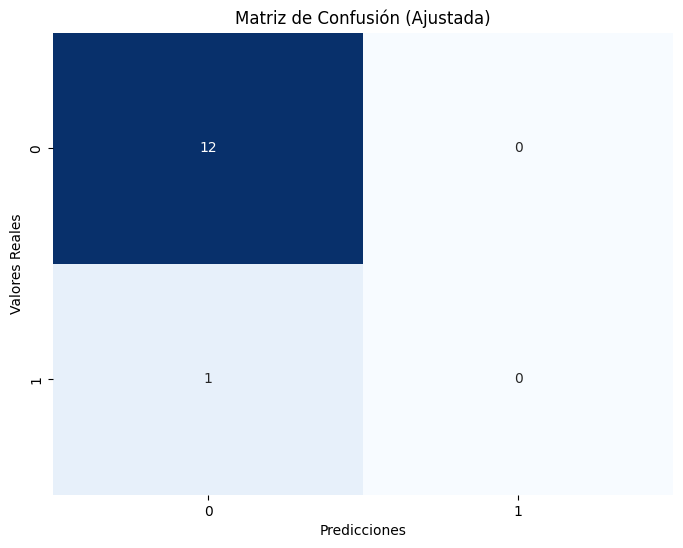

In [78]:

threshold = 0.9  
y_pred_adjusted = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)


cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (Ajustada)')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


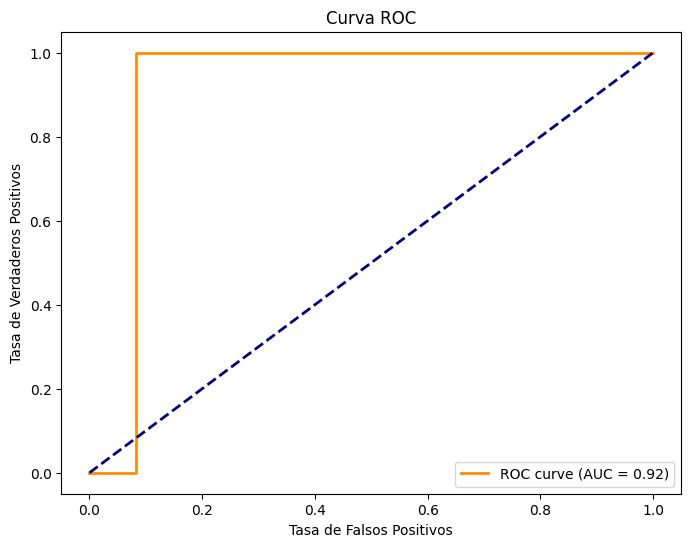

In [79]:
from sklearn.metrics import roc_curve, auc

# Obtener las tasas de falsos positivos y verdaderos positivos
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Crear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
